
!pip install tensorflow

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

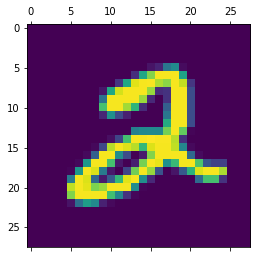

In [7]:
plt.matshow(X_train[5])

In [8]:
y_train[5]

2

In [20]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train_flattend=X_train.reshape(len(X_train),28*28)
X_test_flattend=X_test.reshape(len(X_test),28*28)

In [18]:
X_train_flattend.shape

(60000, 784)

In [19]:
X_test_flattend.shape

(10000, 784)

In [26]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 10.1145 - accuracy: 0.8403
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 6.1323 - accuracy: 0.8792
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.6755 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5367 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3453 - accuracy: 0.8862


## if the accuracy is small...we have to scale the value..

In [27]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [28]:
X_train=X_train/255
X_test=X_test/255

In [29]:
X_train_flattend=X_train.reshape(len(X_train),28*28)
X_test_flattend=X_test.reshape(len(X_test),28*28)

In [57]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),#hidden layer
    keras.layers.Dense(10,activation='sigmoid')#last layer
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2767 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1228 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0849 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9843


In [58]:
model.fit(X_test_flattend,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0799 - accuracy: 0.9748


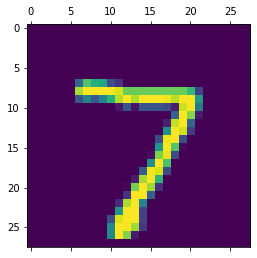

In [59]:
plt.matshow(X_test[0])

In [60]:
y_predict=model.predict(X_test_flattend)

In [61]:
y_predict[0]

array([1.4299017e-01, 5.0887465e-04, 5.5819702e-01, 8.1026393e-01,
       1.9208972e-05, 7.3698908e-02, 8.5576369e-07, 9.9995542e-01,
       8.4569931e-02, 5.0319517e-01], dtype=float32)

In [62]:
np.argmax(y_predict[0])

7

In [63]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_predict])

Text(69.0, 0.5, 'true value')

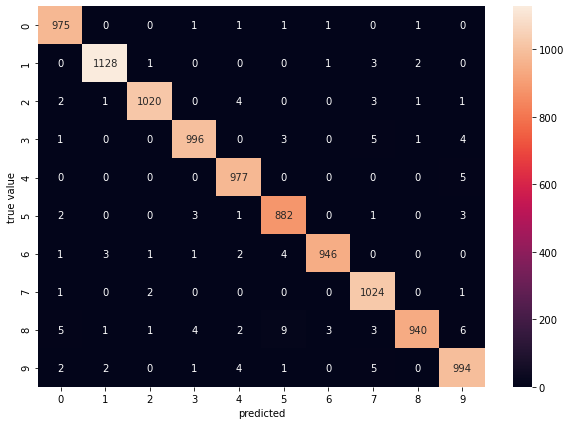

In [64]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true value')


In [65]:
model.evaluate(X_test_flattend,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9882


[0.04020397365093231, 0.9882000088691711]

#### to make flatten the input easy

In [69]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#hidden layer
    keras.layers.Dense(100,activation='relu'),#hidden layer
    keras.layers.Dense(10,activation='sigmoid')#last layer
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2698 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1193 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0831 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0642 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0504 - accuracy: 0.9846
